In [116]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
iris_data = pd.read_csv('./dataset/iris_data.csv')



# Data Exploration 

In [3]:
iris_data.head(10)


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [4]:
iris_data.tail(10)

,5.1,3.5,1.4,0.2,Iris-setosa
139,6.7,3.1,5.6,2.4,Iris-virginica
140,6.9,3.1,5.1,2.3,Iris-virginica
141,5.8,2.7,5.1,1.9,Iris-virginica
142,6.8,3.2,5.9,2.3,Iris-virginica
143,6.7,3.3,5.7,2.5,Iris-virginica
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris_data.count()

5.1            149
3.5            149
1.4            149
0.2            149
Iris-setosa    149
dtype: int64

In [6]:
iris_data.shape

(149, 5)

#### Renaming Columns 

In [7]:
iris_data = iris_data.rename(columns={'5.1':'sepal_lenght_cm', '3.5': 'sepal_width_cm', '1.4':'petal_lenght_cm','0.2':'petal_width_cm','Iris-setosa':'iris_setosa_type'}
                )

In [8]:
iris_data.head()

,sepal_lenght_cm,sepal_width_cm,petal_lenght_cm,petal_width_cm,iris_setosa_type
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [9]:
iris_data.count()

sepal_lenght_cm     149
sepal_width_cm      149
petal_lenght_cm     149
petal_width_cm      149
iris_setosa_type    149
dtype: int64

#### Getting Basic Satistics

In [10]:
iris_data.describe()

,sepal_lenght_cm,sepal_width_cm,petal_lenght_cm,petal_width_cm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# Petal Lenght and Width have a high standard deviation.

In [12]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
sepal_lenght_cm     149 non-null float64
sepal_width_cm      149 non-null float64
petal_lenght_cm     149 non-null float64
petal_width_cm      149 non-null float64
iris_setosa_type    149 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [13]:
# Iris Setosa Type are of Object Type => Convert to float or int

### Exploratory Analysis (Plots)

In [104]:
# Checking for Outliers 

In [103]:
# Box Plots

In [105]:
sb.set(style="whitegrid")

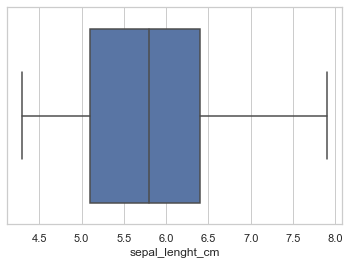

In [106]:
sb.boxplot(x=iris_data['sepal_lenght_cm'])

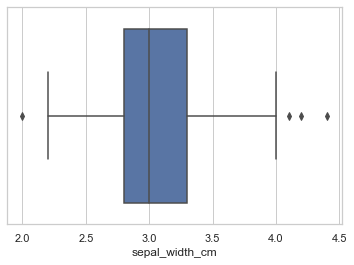

In [107]:
sb.boxplot(x=iris_data['sepal_width_cm'])

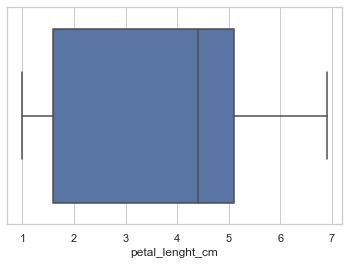

In [108]:
sb.boxplot(x=iris_data['petal_lenght_cm'])

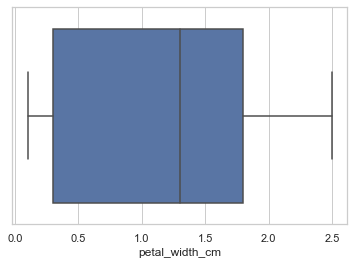

In [109]:
sb.boxplot(x=iris_data['petal_width_cm'])

In [110]:
# Only the Sepal Width Seems to have outliers

In [ ]:
# Using Inter Quartile Formula to get Outliers

In [111]:
Q1 = iris_data.quantile(0.25) # First Quartile
Q3 = iris_data.quantile(0.75) # Last Quartile
IQR = Q3 - Q1
print(IQR)

sepal_lenght_cm    1.3
sepal_width_cm     0.5
petal_lenght_cm    3.5
petal_width_cm     1.5
dtype: float64


In [112]:
iris_data.shape

(149, 5)

In [113]:
print(iris_data < (Q1 - 1.5 * IQR)) |(iris_data > (Q3 + 1.5 * IQR))

     iris_setosa_type  petal_lenght_cm  petal_width_cm  sepal_lenght_cm  \
0               False            False           False            False   
1               False            False           False            False   
2               False            False           False            False   
3               False            False           False            False   
4               False            False           False            False   
..                ...              ...             ...              ...   
144             False            False           False            False   
145             False            False           False            False   
146             False            False           False            False   
147             False            False           False            False   
148             False            False           False            False   

     sepal_width_cm  
0             False  
1             False  
2             False  
3          

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [114]:
iris_data.shape

(149, 5)

In [118]:
iris_2 = iris_data[['sepal_width_cm', 'sepal_lenght_cm','petal_width_cm','petal_lenght_cm']]

In [ ]:
# Using Z score to get columsn which have a Z score of more than 3

In [119]:
z = np.abs(stats.zscore(iris_2))
threshold = 3

In [120]:
iris_2.shape

(149, 4)

In [121]:
iris_2 = iris_2[(z < 3).all(axis=1)] 

In [122]:
iris_2.shape

(148, 4)

In [ ]:
# Notice the Row with Outliers Removed 

In [14]:
# Scatter Plot (Lenght vs Width : Iris-Setosa-Type)

In [15]:
# Sepal :- 

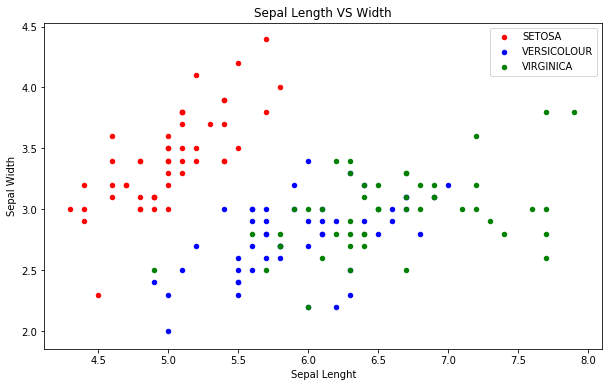

In [16]:
fig = iris_data[iris_data.iris_setosa_type=='Iris-setosa'].plot(kind='scatter',x='sepal_lenght_cm',y='sepal_width_cm',color='red', label='SETOSA')
iris_data[iris_data.iris_setosa_type=='Iris-versicolor'].plot(kind='scatter',x='sepal_lenght_cm',y='sepal_width_cm',color='blue', label='VERSICOLOUR',ax=fig)
iris_data[iris_data.iris_setosa_type=='Iris-virginica'].plot(kind='scatter',x='sepal_lenght_cm',y='sepal_width_cm',color='green', label='VIRGINICA', ax=fig)
fig.set_ylabel("Sepal Width")
fig.set_xlabel("Sepal Lenght")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [17]:
# Sepals have a distribution of mixed clusters , which makes its harder to identify .

In [18]:
# Petal :-

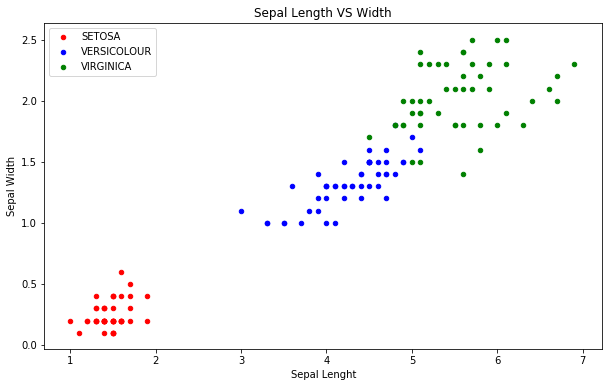

In [19]:
fig = iris_data[iris_data.iris_setosa_type=='Iris-setosa'].plot(kind='scatter',x='petal_lenght_cm',y='petal_width_cm',color='red', label='SETOSA')
iris_data[iris_data.iris_setosa_type=='Iris-versicolor'].plot(kind='scatter',x='petal_lenght_cm',y='petal_width_cm',color='blue', label='VERSICOLOUR',ax=fig)
iris_data[iris_data.iris_setosa_type=='Iris-virginica'].plot(kind='scatter',x='petal_lenght_cm',y='petal_width_cm',color='green', label='VIRGINICA', ax=fig)
fig.set_ylabel("Sepal Width")
fig.set_xlabel("Sepal Lenght")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [20]:
# petals have a clearer distribution and is a better indicator for cluster identification

In [21]:
# Histogram Plots (Lenghts and Widths)

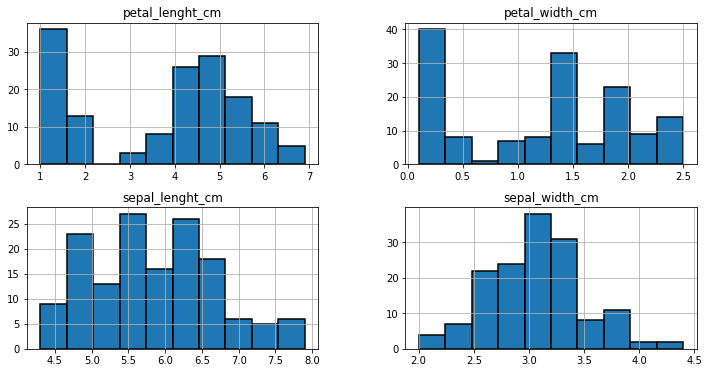

In [22]:
iris_data.hist(edgecolor='black', linewidth=1.5)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [23]:
# Petals have a multimodal distribution
# Sepals have a closer to normal distribution

In [24]:
# Violin Plots (Petals vs Iris Type , Widhts vs Iris Type)

Text(0, 0.5, 'Sepal Width')

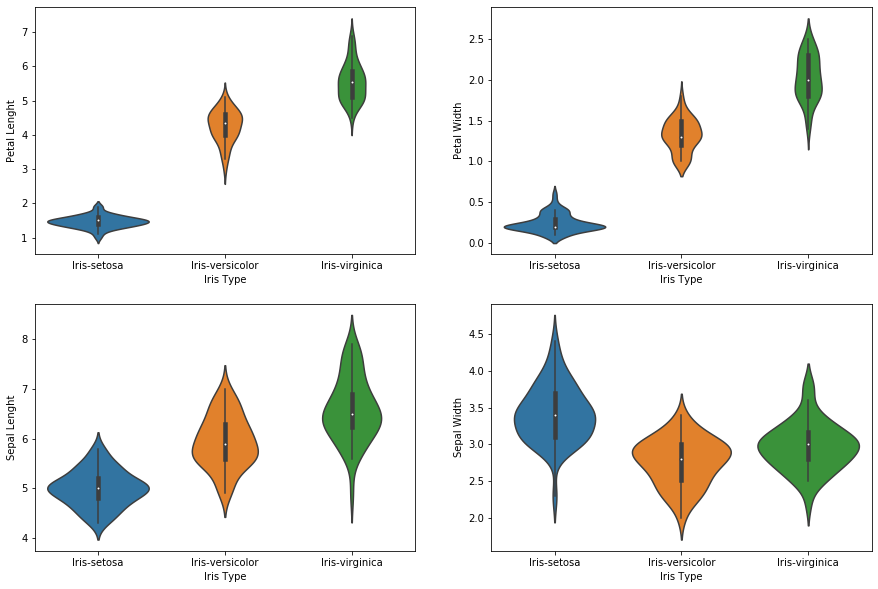

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sb.violinplot(x='iris_setosa_type',y='petal_lenght_cm',data=iris_data)
plt.xlabel('Iris Type')
plt.ylabel('Petal Lenght')
plt.subplot(2,2,2)
sb.violinplot(x='iris_setosa_type',y='petal_width_cm',data=iris_data)
plt.xlabel('Iris Type')
plt.ylabel('Petal Width')
plt.subplot(2,2,3)
sb.violinplot(x='iris_setosa_type',y='sepal_lenght_cm',data=iris_data)
plt.xlabel('Iris Type')
plt.ylabel('Sepal Lenght')
plt.subplot(2,2,4)
sb.violinplot(x='iris_setosa_type',y='sepal_width_cm',data=iris_data)
plt.xlabel('Iris Type')
plt.ylabel('Sepal Width')


In [26]:
# ViolinPlots : More Widht => Higher Density , Less Width => Lower Density
# IRIS_SETOSA : Have the highest density in Petal Lenght, Petal Width and Sepal Lenght
# IRIS_VIRGINICA : Have the lowest lenght in Petal Lenght , Petal Widht and Sepal Lenght
# Each Type has almost equal widht in Sepal Width

## Model Building 

In [27]:
# Since This is a Classification Problem , Classification Algorithms will be used .

In [28]:
# Classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

# Regression: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

In [29]:
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm

from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours

from sklearn import svm  #for Support Vector Machine (SVM) Algorithm

from sklearn.tree import DecisionTreeClassifier # for Decision Tree Algoithm

from sklearn import metrics # for checking the model accuracy

from sklearn.model_selection import train_test_split # to split the dataset for training and testing

#### Checking Corelations

In [30]:
# if Features have high corelation it reduces the algorithms accuracy 

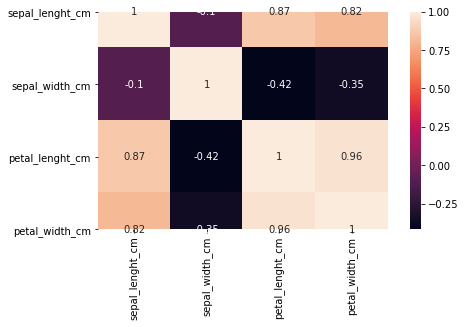

In [31]:
plt.figure(figsize=(8,4)) 
sb.heatmap(iris_data.corr(),annot=True, square=True) #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [32]:
'''


The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy
of the algorithm as we are using only 2 features that are not correlated.

Thus we can have a variance in the dataset which may help in better accuracy.
We will check it later.

'''


'\n\n\nThe Sepal Width and Length are not correlated The Petal Width and Length are highly correlated\n\nWe will use all the features for training the algorithm and check the accuracy.\n\nThen we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy\nof the algorithm as we are using only 2 features that are not correlated.\n\nThus we can have a variance in the dataset which may help in better accuracy.\nWe will check it later.\n\n'

#### Splitting data into test and train sets

In [34]:
train, test = train_test_split(iris_data, test_size = 0.2) # 80/20 ratio

In [35]:
train.shape

(119, 5)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 36 to 42
Data columns (total 5 columns):
sepal_lenght_cm     119 non-null float64
sepal_width_cm      119 non-null float64
petal_lenght_cm     119 non-null float64
petal_width_cm      119 non-null float64
iris_setosa_type    119 non-null object
dtypes: float64(4), object(1)
memory usage: 5.6+ KB


In [38]:
test.shape

(30, 5)

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 10 to 99
Data columns (total 5 columns):
sepal_lenght_cm     30 non-null float64
sepal_width_cm      30 non-null float64
petal_lenght_cm     30 non-null float64
petal_width_cm      30 non-null float64
iris_setosa_type    30 non-null object
dtypes: float64(4), object(1)
memory usage: 1.4+ KB


In [40]:
X = train[['sepal_lenght_cm','sepal_width_cm','petal_lenght_cm', 'petal_width_cm']]

In [41]:
Y = train.iris_setosa_type

In [42]:
x = test[['sepal_lenght_cm','sepal_width_cm','petal_lenght_cm', 'petal_width_cm']]

In [43]:
y = test.iris_setosa_type

In [44]:
X.head()

,sepal_lenght_cm,sepal_width_cm,petal_lenght_cm,petal_width_cm
36,4.9,3.1,1.5,0.1
116,7.7,3.8,6.7,2.2
1,4.7,3.2,1.3,0.2
70,6.1,2.8,4.0,1.3
49,7.0,3.2,4.7,1.4


In [45]:
x.head()

,sepal_lenght_cm,sepal_width_cm,petal_lenght_cm,petal_width_cm
10,4.8,3.4,1.6,0.2
32,5.5,4.2,1.4,0.2
53,6.5,2.8,4.6,1.5
145,6.3,2.5,5.0,1.9
67,6.2,2.2,4.5,1.5


### Deciding Models Based on Accuracy (With ALL Features)

#### Decision Tree Algorithm

In [46]:
model = DecisionTreeClassifier()

In [47]:
model.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [48]:
prediction = model.predict(x)
print("The Accuracy of Decision Tree is : " , metrics.accuracy_score(prediction,y))

The Acuuracy of Decision Tree is :  0.9333333333333333


#### Support Vector Machine Algorithm

In [49]:
model = svm.SVC()

In [50]:
model.fit(X,Y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [51]:
prediction = model.predict(x)
print("The Accuracy of SVM is : ", metrics.accuracy_score(prediction,y))

The Accuracy of SVM is :  1.0


#### Logistic Regression Algorithm

In [52]:
model = LogisticRegression()

In [53]:
model.fit(X,Y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
prediction = model.predict(x)
print("The Accuracy of Logistic Regression is : " , metrics.accuracy_score(prediction,y))

The Accuracy of Logistic Regression is :  0.9333333333333333


#### K Nearest Neighbours

In [55]:
model = KNeighborsClassifier(n_neighbors=6)

In [56]:
model.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [57]:
prediction = model.predict(x)
print("The Accuracy of KNN wiht 6 neighbours is : ", metrics.accuracy_score(prediction,y))

The Accuracy of KNN wiht 6 neighbours is :  1.0


### Deciding Models Based on Accuracy (With Strongly Correlated Features : Petal Lenght and Petal Width)


In [59]:
petal = iris_data[['petal_width_cm','petal_lenght_cm','iris_setosa_type']]

In [60]:
p_train,p_test = train_test_split(petal,test_size=0.2,random_state=0)

In [62]:
petal_X = p_train[['petal_width_cm','petal_lenght_cm']]
petal_Y = p_train.iris_setosa_type

In [64]:
petal_x = p_test[['petal_width_cm','petal_lenght_cm']]
petal_y = p_test.iris_setosa_type

In [65]:
petal_X.head()

,petal_width_cm,petal_lenght_cm
29,0.2,1.6
129,1.9,6.1
49,1.4,4.7
135,2.4,5.6
99,2.5,6.0


In [66]:
petal_x.head()

,petal_width_cm,petal_lenght_cm
133,1.4,5.6
109,2.0,5.1
59,1.0,3.5
80,1.0,3.7
7,0.2,1.4


#### Decision Tree Algorithm 

In [67]:
model = DecisionTreeClassifier()


In [68]:
model.fit(petal_X,petal_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
prediction = model.predict(petal_x)
print("The Accuracy of Decison Tree is : ", metrics.accuracy_score(prediction,petal_y))

The Accuracy of Decison Tree is :  0.95


#### Support Vector Machine

In [70]:
model = svm.SVC()


In [71]:
model.fit(petal_X,petal_Y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [72]:
prediction = model.predict(petal_x)
print("The Accuracy of SVM is :", metrics.accuracy_score(prediction,petal_y))

The Accuracy of SVM is : 0.9333333333333333


#### Logistic Regression Algorithm

In [73]:
model = LogisticRegression()

In [74]:
model.fit(petal_X,petal_Y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
prediction = model.predict(petal_x)
print("The Accuracy of Logisitc Regression is : ", metrics.accuracy_score(prediction , petal_y))

The Accuracy of Logisitc Regression is :  0.9166666666666666


#### K Nearest Neighbours 

In [100]:
model = KNeighborsClassifier(n_neighbors=3)

In [101]:
model.fit(petal_X,petal_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [102]:
prediction = model.predict(petal_x)
print("The Accuracy of KNN with 6 neighbours is :",metrics.accuracy_score(prediction,petal_y))

The Accuracy of KNN with 6 neighbours is : 0.9666666666666667
